In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [6]:
data_df = pd.read_csv("data.csv")

In [7]:
data_df.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,duration,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,152.0,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,78.0,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,324.0,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,130.0,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,62.0,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no


In [8]:
data_df.describe()

,age,duration,campaign,prev_days,prev_contacts,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.019059,257.768498,2.641639,961.537906,0.174385,0.080115,93.583705,-40.496740,3.618901,5166.932832
std,10.850807,258.869579,2.803230,189.209917,0.498989,1.573180,1.162662,4.645301,1.737149,72.439480
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.695294,88.311974,-52.220779,0.325461,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.724208,92.800661,-43.087110,1.377065,5101.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.085053,93.586959,-41.685507,4.800570,5194.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.366367,94.381404,-36.404580,4.943674,5226.000000
max,97.000000,4924.000000,56.000000,999.000000,7.000000,1.785673,98.263042,-25.323735,5.362403,5249.000000


In [10]:
# The variables prev_days has many 999 values.
#'prev_contacts' = 0 for most of the data

In [9]:
data_df.describe(include=["object"])

,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,prev_outcomes,subscribed
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8342,19955,9760,26059,17176,27179,20902,11016,6945,28423,29238


In [12]:
cat_vars = data_df.describe(include=["object"]).columns
cont_vars = data_df.describe().columns

In [13]:
cat_vars

Index(['job', 'marital_status', 'education', 'credit_default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'prev_outcomes',
       'subscribed'],
      dtype='object')

In [14]:
cont_vars

Index(['age', 'duration', 'campaign', 'prev_days', 'prev_contacts',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed'],
      dtype='object')

### Univariate analysis of Categorical and Continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A87976A20>,
      dtype=object)

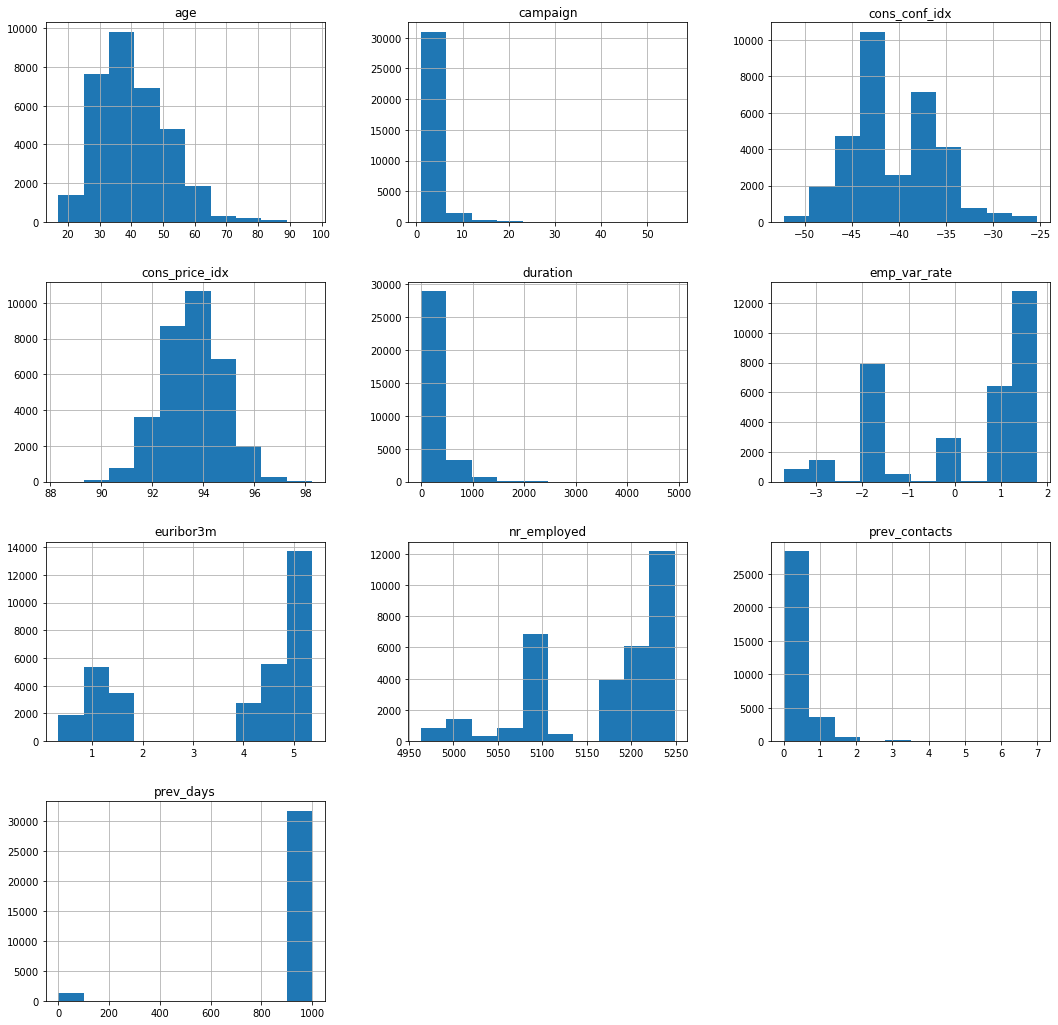

In [15]:
data_df.hist(column=cont_vars, figsize = (18,18))

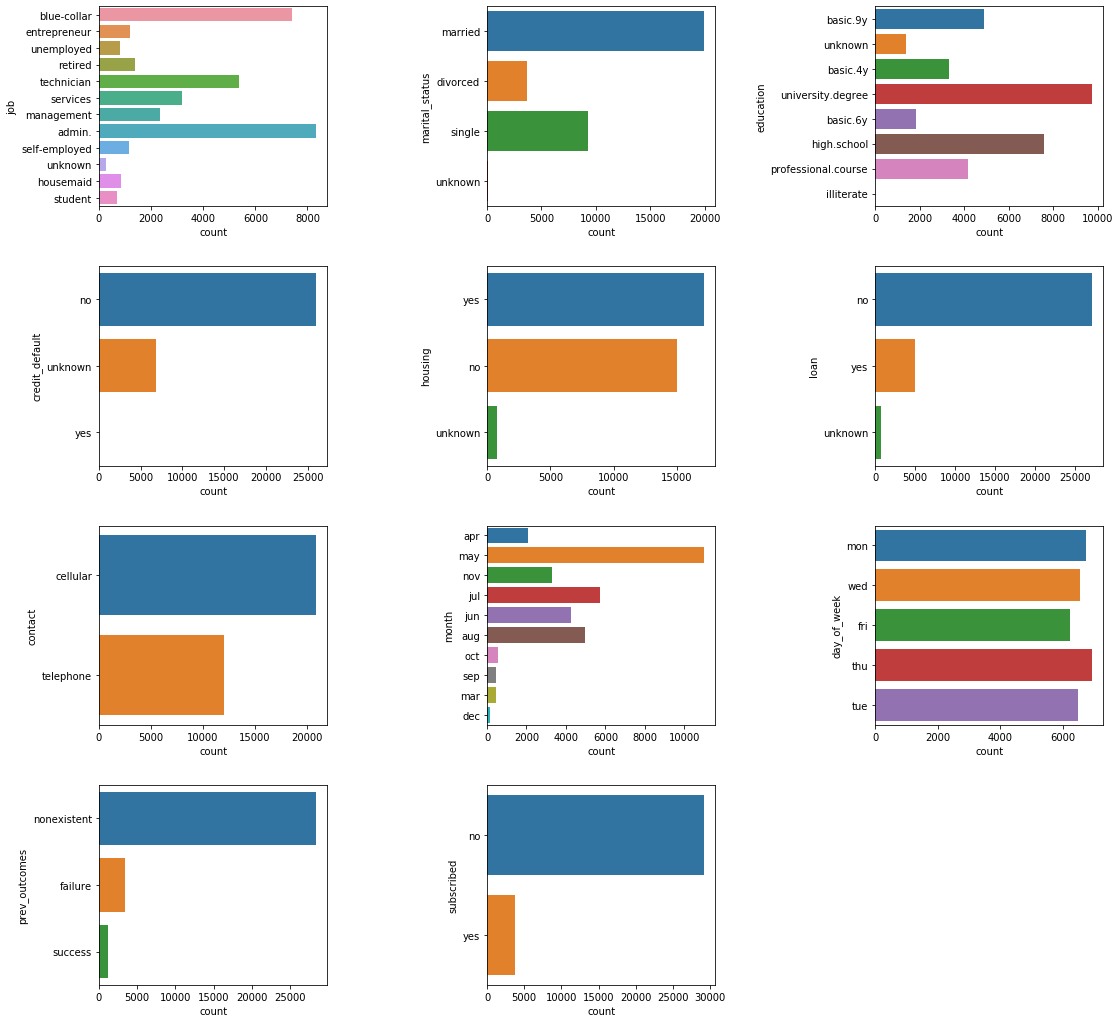

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = cat_vars[i], data=data_df, ax=ax)

JOB
-----
Most of jobs in the dataset belong to just three categories i.e  admin, blue-collar and technician. Also, the limited number of the types of jobs may limit the predictive power of this variable

Marital status
-------------------

The distribution of this variable is relatively balanced between the married and single (single + divorced) individuals. There is a small proportion of people with unknown marital status. There are more number of married individuals

Education
--------------
More than half of targeted individuals have a university degree or a high school diploma.

Default
------
There is a very small number of respondents who defaulted on a credit, so this variable doesn’t look very useful for prediction purposes and can be dropped from the dataset.

Housing
-------
The respondents that have a housing loan and those that don’t have equal split.

Loan
-----
Most of the respondents do not have a personal loan.


Contact
--------
More than 50 percent of all respondents were contacted via a cellular phone. 


Month
-----
Most of the respondents were contacted during the summer months, with most of all contacts happening in May which makes data a bit skewed 

Day of week
-----

The day of the last contact is distributed almost uniformly across the days of the week, so there is no obvious skewness towards a particular day or days

prev_outcome
------
More than 80% of respondents were never covered by previous marketing campaigns. The existing customers may be more willing to open a deposit than someone who never heard of that bank before.

y
--

Only ~10% of the respondents to the current campaign have actually subscribed for a deposit as a result of the campaign

,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,prev_outcomes,subscribed
0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,nonexistent,no
1,entrepreneur,married,unknown,no,no,no,cellular,may,wed,nonexistent,no
2,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,nonexistent,no
3,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,nonexistent,no
4,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,nonexistent,no
